In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


## Association Rule Mining

<i>Association Rule Mining is a data mining technique used to discover interesting relationships, patterns, or associations among a set of items in large datasets. It is widely applied in market basket analysis to identify items that frequently co-occur in transactions.</i>

Each rule is evaluated using key metrics:

<ul>
    <li>Support: Indicates how frequently the itemset appears in the dataset.</li>

<li>Confidence: Measures how often the rule has been found to be true.</li>

<li>Lift: Indicates how much more likely the consequent is, given the antecedent, compared to it being independent.</li>
</ul>

## Apriori

<i>The Apriori algorithm is a classic algorithm used in Association Rule Mining to identify frequent itemsets in a dataset and derive association rules. It is based on the principle that:

"If an itemset is frequent, then all of its subsets must also be frequent."
(This is called the Apriori Property or Downward Closure Property)</i>

⚙️ How Apriori Works – Step by Step
<br>
<b>Step 1: Set a Minimum Support Threshold</b>
<br>
You begin by defining a minimum support value — only itemsets that occur in at least this proportion of transactions will be considered.

<b>Step 2: Generate Frequent 1-itemsets</b>
<br>
Count how often each individual item appears in the dataset. Keep only those items whose frequency ≥ minimum support.

<b>Step 3: Generate Candidate k-itemsets</b>
<br>
Use the frequent (k–1)-itemsets to generate candidate k-itemsets by joining them with each other.

<b>Step 4: Prune Infrequent Candidates</b>
<br>
Apply the Apriori property: remove candidates if any of their subsets are not frequent.

<b>Step 5: Count Support for Candidates</b>
<br>
Scan the dataset to count the actual support for each remaining candidate itemset.

<b>Step 6: Repeat</b>
<br>
Repeat Steps 3–5 for increasing values of k (2-itemsets, 3-itemsets, etc.) until no more frequent itemsets are found.

<b>Step 7: Generate Association Rules</b>
<br>
From the frequent itemsets, generate rules that meet a minimum confidence threshold (e.g., {A, B} → {C}).





In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
transactions=[
   ['Milk', 'Egg', 'Bread', 'Butter'],
    ['Milk', 'Butter', 'Egg', 'Ketchup'],
    ['Bread', 'Butter', 'Ketchup'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Cookies'],
    ['Milk', 'Bread', 'Butter', 'Cookies'],
    ['Milk', 'Cookies'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Egg', 'Cookies'],
    ['Milk', 'Butter', 'Bread'],
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread', 'Cookies', 'Ketchup']
]

In [21]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

df

,Bread,Butter,Cookies,Egg,Ketchup,Milk
0,True,True,False,True,False,True
1,False,True,False,True,True,True
2,True,True,False,False,True,False
3,True,True,False,False,False,True
4,True,True,True,False,False,False
5,True,True,True,False,False,True
6,False,False,True,False,False,True
7,True,True,False,False,False,True
8,True,True,True,True,False,False
9,True,True,False,False,False,True


In [23]:
import matplotlib.pyplot as plt
item_counts=df.sum().sort_values(ascending=False)

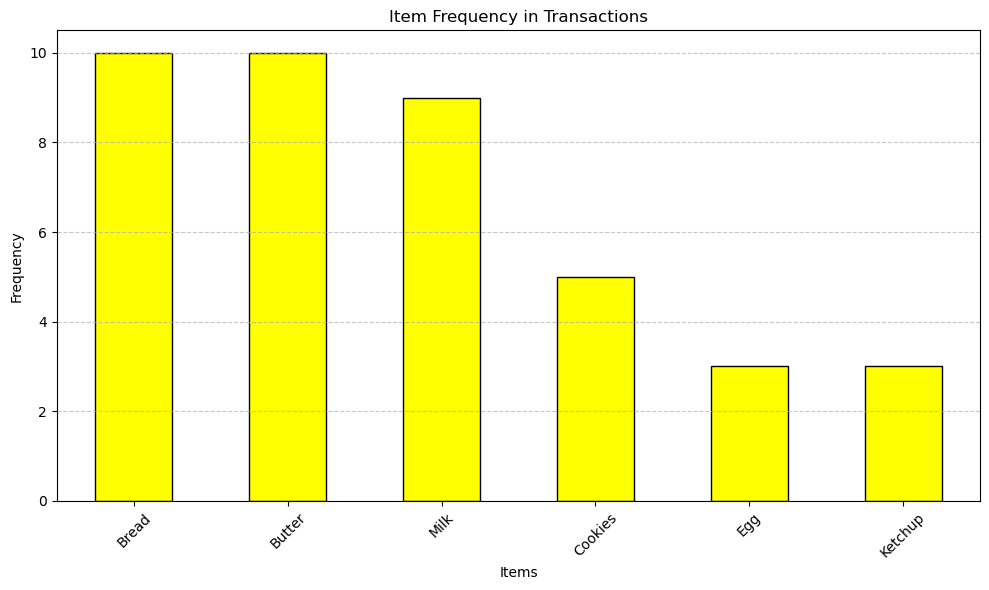

In [43]:
plt.figure(figsize=(10,6))
item_counts.plot(kind='bar',color='yellow', edgecolor='black')
plt.title('Item Frequency in Transactions')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the above plot:
<ul>
    <li>Bread is the most common item in all the transactions to purchase.</li>
    <li>As well as Butter is also equal to the Bread suggested in all the transactions to purchase.</li>
    <li>Milk is giving tough competition to Bread and Butter, suggesting purchasing.</li>
    <li>Cookies are leading with half of the majority, which means that based on the buyer's interest, they will purchase. </li>
    <li>Egg and Ketchup are leads to equal  minority, we can say that these are the least suggested</li>
    
</ul>

In [51]:
frequent_itemsets= apriori(df, min_support=0.33, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.833333,(Bread)
1,0.833333,(Butter)
2,0.416667,(Cookies)
3,0.750000,(Milk)
4,0.750000,"(Bread, Butter)"
5,0.333333,"(Bread, Cookies)"
6,0.583333,"(Milk, Bread)"
7,0.583333,"(Milk, Butter)"
8,0.500000,"(Milk, Bread, Butter)"


In [59]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [83]:
print(" Frequent Itemsets (Support ≥ 33%):\n", frequent_itemsets)
print("\n Association Rules (Confidence ≥ 50%):\n", rules[['antecedents', 'consequents', 'support', 'confidence']])

 Frequent Itemsets (Support ≥ 33%):
 [(['Bread'], 6), (['Bread', 'Butter'], 4), (['Bread', 'Butter', 'Milk'], 2), (['Bread', 'Butter', 'Coke'], 2), (['Bread', 'Butter', 'Jam'], 2), (['Bread', 'Milk'], 3), (['Bread', 'Milk', 'Coke'], 2), (['Bread', 'Coke'], 4), (['Bread', 'Jam'], 2), (['Butter'], 7), (['Butter', 'Milk'], 4), (['Butter', 'Milk', 'Coke'], 2), (['Butter', 'Coke'], 4), (['Butter', 'Jam'], 2), (['Milk'], 5), (['Milk', 'Coke'], 3), (['Coke'], 6), (['Jam'], 2)]

 Association Rules (Confidence ≥ 50%):
         antecedents      consequents   support  confidence
0           (Bread)         (Butter)  0.750000    0.900000
1          (Butter)          (Bread)  0.750000    0.900000
2         (Cookies)          (Bread)  0.333333    0.800000
3            (Milk)          (Bread)  0.583333    0.777778
4           (Bread)           (Milk)  0.583333    0.700000
5            (Milk)         (Butter)  0.583333    0.777778
6          (Butter)           (Milk)  0.583333    0.700000
7     (Milk,

<b>Frequent Itemsets (Support ≥ 33%)</b>
<br>
This part lists itemsets that appear frequently in your dataset, filtered by a minimum support threshold of 33%. Each line shows:
<li>Itemsets: These are combinations of items (e.g., ['Bread', 'Butter']) found together in transactions.</li>
<li>['Bread'] , 6 → "Bread" appeared in 6 transactions.</li>

<li>['Bread', 'Butter'] , 4 → "Bread and Butter" appeared together in 4 transactions.</li>

<li>['Bread', 'Butter', 'Milk'] , 2 → This 3-item combo appeared in 2 transactions.</li>
<br>
<b>Association Rules (Confidence ≥ 50%)</b>
This section shows the actual association rules that were derived from the frequent itemsets, filtered by confidence ≥ 50%
<li>{Milk} → {Butter} (strong confidence): If a customer buys Milk, they are highly likely to buy Butter.</li>
<li>{Bread, Butter} → {Milk}: People who buy Bread & Butter often buy Milk too.</li>
<li>{Cookies} → {Milk}: A strong indicator that Cookies are frequently paired with Milk.</li>

## ECLAT ((Equivalence Class Clustering and bottom-up Lattice Traversal)

<i>ECLAT is an efficient algorithm for frequent itemset mining. Unlike Apriori, which uses a horizontal layout (transactions as rows), ECLAT uses a vertical data layout, where items are associated with a list of transaction IDs (TID list).

ECLAT stands for:

<b>Equivalence Class Clustering and Bottom-Up Lattice Traversal</b>

It explores the itemset lattice in a depth-first manner and is particularly faster than Apriori in many cases.</i>

⚙️ How ECLAT Works – Step by Step
<br>
<b>Step 1: Vertical Transformation</b>
<br>
Convert the transactional database into a vertical format:
<li>Each item is represented with a list of Transaction IDs (TIDs) in which it appears</li>

<b>Step 2: Intersection for Support Counting</b>
<br>
<li>To find the support of any itemset (e.g., {A, B}), intersect the TID lists of A and B</li>

<b>Step 3: Recursive Depth-First Mining</b>
<br>
<li>Begin with 1-itemsets.</li>

<li>Recursively combine itemsets and intersect their TID lists to generate larger itemsets.</li>

<li>Prune branches early if the itemset’s support is below the minimum threshold.</li>

<b>Step 4: Stop When No More Frequent Itemsets</b>
<br>
<li>The recursion ends when no more frequent itemsets can be generated.</li>

In [73]:
import pandas as pd
from itertools import combinations

In [81]:
# Step 1: prepare the dataset (from the image)
data = {
    'Bread':   [1,0,0,1,1,0,1,1,1],
    'Butter':  [1,1,1,1,0,1,0,1,1],
    'Milk':    [0,0,1,0,1,1,0,1,1],
    'Coke':    [0,1,0,1,1,1,1,1,0],
    'Jam':     [1,0,0,0,0,0,0,1,0]
}
df = pd.DataFrame(data, index=[f"T{i+1}" for i in range(9)])

# Step 2: Convert to vertical format (item → list of transaction IDs)
vertical_data = {}
for item in df.columns:
    vertical_data[item] = set(df[df[item] == 1].index)

# Step 3: Define minimum support threshold (33% of 9 = 3 transactions)
min_support = 2

# Step 4: Generate frequent itemsets
def eclat(prefix, items, min_support, frequent_itemsets):
    for i in range(len(items)):
        item, tid_set = items[i]
        new_prefix = prefix + [item]
        support = len(tid_set)
        if support >= min_support:
            frequent_itemsets.append((new_prefix, support))
            remaining_items = []
            for j in range(i+1, len(items)):
                item_j, tid_set_j = items[j]
                intersection = tid_set & tid_set_j
                if len(intersection) >= min_support:
                    remaining_items.append((item_j, intersection))
            if remaining_items:
                eclat(new_prefix, remaining_items, min_support, frequent_itemsets)

# Step 5: Run the algorithm
initial_items = list(vertical_data.items())
frequent_itemsets = []
eclat([], initial_items, min_support, frequent_itemsets)

# Step 6: Display results
print(" Frequent Itemsets using ECLAT (support ≥ 3):")
for itemset, support in frequent_itemsets:
    print(f"Items: {itemset}, Support: {support}")


 Frequent Itemsets using ECLAT (support ≥ 3):
Items: ['Bread'], Support: 6
Items: ['Bread', 'Butter'], Support: 4
Items: ['Bread', 'Butter', 'Milk'], Support: 2
Items: ['Bread', 'Butter', 'Coke'], Support: 2
Items: ['Bread', 'Butter', 'Jam'], Support: 2
Items: ['Bread', 'Milk'], Support: 3
Items: ['Bread', 'Milk', 'Coke'], Support: 2
Items: ['Bread', 'Coke'], Support: 4
Items: ['Bread', 'Jam'], Support: 2
Items: ['Butter'], Support: 7
Items: ['Butter', 'Milk'], Support: 4
Items: ['Butter', 'Milk', 'Coke'], Support: 2
Items: ['Butter', 'Coke'], Support: 4
Items: ['Butter', 'Jam'], Support: 2
Items: ['Milk'], Support: 5
Items: ['Milk', 'Coke'], Support: 3
Items: ['Coke'], Support: 6
Items: ['Jam'], Support: 2
